## ΜΕΡΟΣ 1

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, ElasticNet, LinearRegression, Lasso
from sklearn.metrics import accuracy_score, mean_absolute_error


### ΕΡΩΤΗΜΑ 1

#### Load Dataset

In [2]:
diabetes = pd.read_csv('./diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Plot Variables

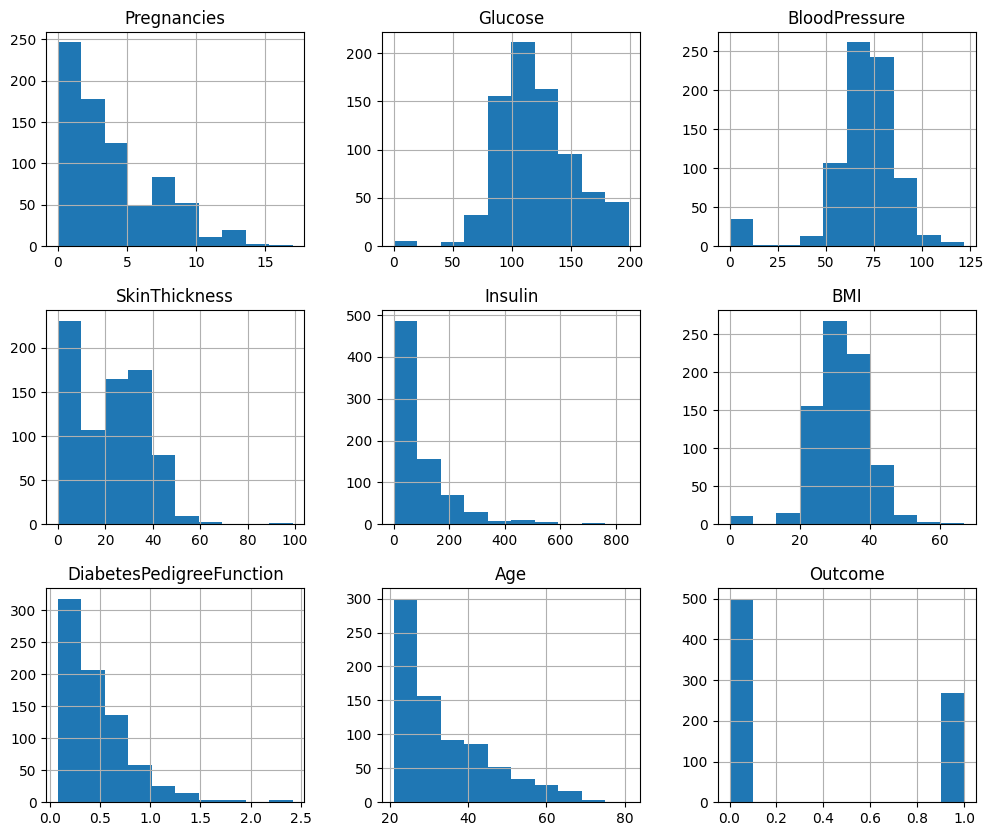

In [4]:
diabetes.hist(figsize=(12,10), bins=10)
plt.show()

([<matplotlib.axis.XTick at 0x27c2a6f8310>,
 [Text(0, 0, 'Non-diabetic'), Text(1, 0, 'Diabetic')])

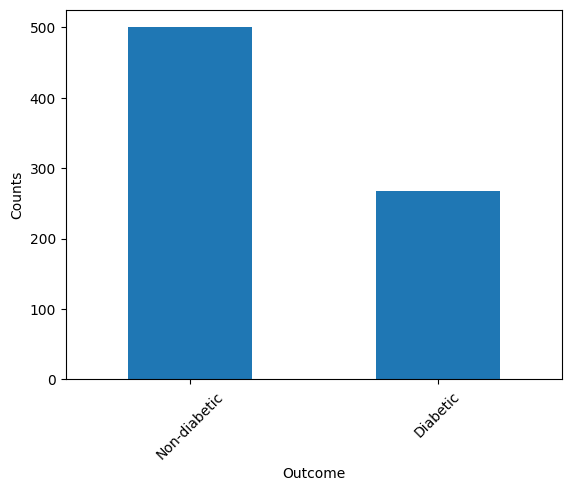

In [5]:
diabetes['Outcome'].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.xticks(ticks=[0,1], labels=['Non-diabetic', 'Diabetic'], rotation=45)


### ΕΡΩΤΗΜΑ 2


Τα δεδομένα μας δεν είναι καλής ποιότητας για τους εξής λόγους:
- Τα περισσότερα δεδομένα (Pregnancies, Insulin, DiabetesPedigreeFunction, Age) δεν είναι όμοια κατανεμημένα, με αποτέλεσμα το μοντέλο μας να μην έχει μεγάλη ποικιλία για να μάθει.
- Ο στόχος μας είναι να προβλέψουμε εάν κάποιος ασθενείς είναι διαβητικός, αλλά τα δεδομένα που έχουμε είναι κυρίως για μη-διαβητικούς ασθενείς οπότε το μοντέλο θα μάθει κυρίως να ξεχωρίζει ποιος δεν είναι διαβητικός και όχι το αντίθετο που είναι πιο σημαντικό.

### ΕΡΩΤΗΜΑ 3
Τα δείγματα της ηλικίας ακολουθούν την εκθετική κατανομή, όπου έχουμε μεγάλο όγκο δεδομένων για μικρές τιμές και ελαττώνονται απότομα όσο προχωράμε.
Η συγκεκριμένη κατανομή δεν είναι κατάλληλη για αυτή την εργασία που θέλουμε, διότι περιέχει κυρίως μικρής ηλικίας άτομα και το μοντέλο μας θα προσαρμοστεί και θα μάθει κυρίως σε αυτές τις ηλικίες. 

### ΕΡΩΤΗΜΑ 4

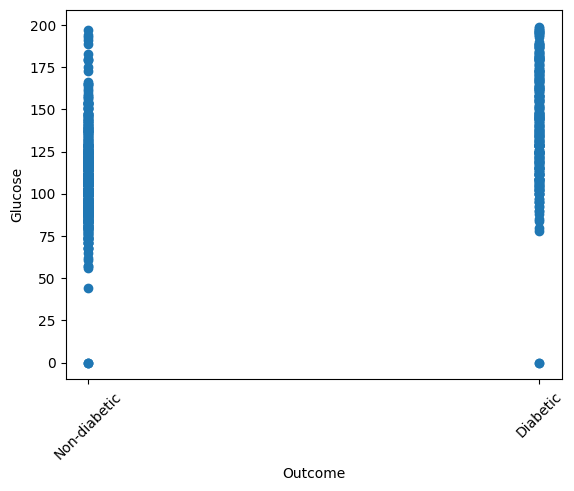

In [6]:
plt.scatter(diabetes['Outcome'], diabetes['Glucose'])
plt.xticks(ticks=[0,1], labels=['Non-diabetic', 'Diabetic'], rotation=45)
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

Παρατηρούμε ότι όσοι ασθενείς είναι διαβητικοί έχουν κυρίως τιμές για την γλυκόζη `>100`, σε αντίθεση με του μη-διαβητικούς που έχουν μέχρι `~140`.

### ΕΡΩΤΗΜΑ 5

In [7]:
input_df = diabetes.drop(columns=['Outcome'])
targets_df = diabetes['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

#### Split Dataset to Train-Test

- Train Samples: 537
- Test Samples: 231

In [8]:
seed = 0
test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

### ΕΡΩΤΗΜΑ 6

In [9]:
model = LogisticRegression(max_iter=1000, random_state=seed)

### Train model on training set

In [10]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Evaluate Model on test set

In [11]:
y_pred_test = model.predict(x_test)
y_pred_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [12]:
y_pred_train = model.predict(x_train)

In [13]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_accuracy_percentage = round(test_accuracy*100, 2)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_accuracy_percentage = round(train_accuracy*100, 2)

print(f'The accuracy of the model in training set is: {train_accuracy_percentage}')
print(f'The accuracy of the model in test set is: {test_accuracy_percentage}')

The accuracy of the model in training set is: 76.54
The accuracy of the model in test set is: 77.92


Παρατηρούμε ότι το μοντέλο μας τα πάει καλύτερα στα test δεδομένα (77.92%) παρά στα training δεδομένα(76.54%).
Θεωρώ ότι αυτό συμβαίνει διότι για το πλήθος των δεδομένων που έχουμε (768), διαχωρίζουμε μεγαλό ποσοστό του dataset μας για test_data (30%), ενώ άμα θέσουμε το ποσοστό σε *85%-15%* αυξάνεται το score του test set σε 82.76%

### ΕΡΩΤΗΜΑ 7

In [14]:
input_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [15]:
mask0_25 = x_test[:, 7] <= 25
mask25_50 = (x_test[:, 7] > 25) & (x_test[:, 7] <= 50)
mask50 = x_test[:, 7] > 50

x_test0_25 = x_test[mask0_25]
y_test0_25 = y_test[mask0_25]

x_test25_50 = x_test[mask25_50]
y_test25_50 = y_test[mask25_50]

x_test_50 = x_test[mask50]
y_test_50 = y_test[mask50]

accuracy_percentage = []

y_pred0_25 = model.predict(x_test0_25)
accuracy = accuracy_score(y_test0_25, y_pred0_25)
accuracy_percentage.append(round(accuracy*100, 2))


y_pred25_50 = model.predict(x_test25_50)
accuracy = accuracy_score(y_test25_50, y_pred25_50)
accuracy_percentage.append(round(accuracy*100, 2))

y_pred0_25 = model.predict(x_test0_25)
accuracy = accuracy_score(y_test0_25, y_pred0_25)
accuracy_percentage.append(round(accuracy*100, 2))


Text(0, 0.5, 'Score Percentage')

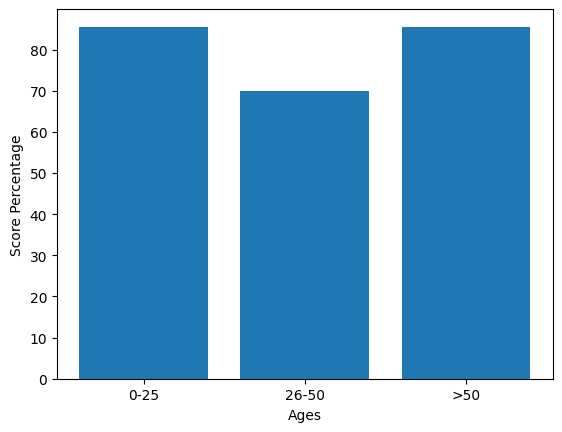

In [16]:
plt.bar(['0-25', '26-50', '>50'], accuracy_percentage)
plt.xlabel('Ages')
plt.ylabel('Score Percentage')

### ΕΡΩΤΗΜΑ 8

Προφανώς είναι χειρότερο το μοντέλο μας να μην προβλέψει ότι κάποιος είναι διαβητικός ενώ στη πραγματικότητα είναι, παρά να δώσει λανθασμένη πρόβλεψη ότι είναι ενώ δεν είναι, διότι εφόσον προβλέπουμε κάτι τόσο σοβαρό όσο ο διαβήτης καλύτερα να υπάρξει κάποιος *λανθασμένος συναγερμός* παρά καθόλου *συναγερμός*.

### ΕΡΩΤΗΜΑ 9

In [17]:
test_size = 0.30
avg_training_score = 0
avg_test_score = 0
test_scores = []
for i in range(10):
    seed = i
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    train_score = accuracy_score(y_train, y_pred_train)
    train_score_percentage = round(train_score*100, 2)
    avg_training_score+=train_score_percentage

    test_score = accuracy_score(y_test, y_pred_test)
    test_score_percentage = round(test_score*100, 2)
    avg_test_score+=test_score_percentage
    test_scores.append(test_score_percentage)

    print(f"Seed {seed}\n{'-'*30}")
    print(f"The accuracy of the model in training set is: {train_score_percentage}")
    print(f"The accuracy of the model in test set is: {test_score_percentage}\n")

Seed 0
------------------------------
The accuracy of the model in training set is: 76.54
The accuracy of the model in test set is: 77.92

Seed 1
------------------------------
The accuracy of the model in training set is: 77.28
The accuracy of the model in test set is: 78.35

Seed 2
------------------------------
The accuracy of the model in training set is: 78.58
The accuracy of the model in test set is: 74.89

Seed 3
------------------------------
The accuracy of the model in training set is: 78.77
The accuracy of the model in test set is: 75.32

Seed 4
------------------------------
The accuracy of the model in training set is: 75.98
The accuracy of the model in test set is: 80.95

Seed 5
------------------------------
The accuracy of the model in training set is: 76.35
The accuracy of the model in test set is: 78.35

Seed 6
------------------------------
The accuracy of the model in training set is: 76.91
The accuracy of the model in test set is: 76.62

Seed 7
--------------------

### Average Test Score

In [18]:
avg_training_score/=10
avg_test_score/=10
print(f'The average accuracy of the model in training set is: {avg_training_score}')
print(f'The average accuracy of the model in test set is: {avg_test_score}')

The average accuracy of the model in training set is: 77.65299999999999
The average accuracy of the model in test set is: 77.27


### Standard Deviation of Accuracy
*!NOTE: Δεν γνώριζα αν μπορούμε να χρησιμοποιήοσυμε τη συνάρτηση std() και το υπολόγισα και αναλυτικά από τo τύπο.*

In [19]:
apoklisi = 0
for score in test_scores:
    apoklisi += (score-avg_test_score)*(score-avg_test_score)
standard_deviation = np.sqrt(apoklisi/10)

# Enalaktika
# standard_deviation = np.std(test_scores)

print(f'The standard deviation of accuracy is: {standard_deviation}')


The standard deviation of accuracy is: 1.8689087725194093


### ΕΡΩΤΗΜΑ 10

In [20]:
scaler = MinMaxScaler()
normalizedData = scaler.fit_transform(x)
normalizedData

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]], shape=(768, 8))

### Feature Importance

The larger the absolute weight value, the better

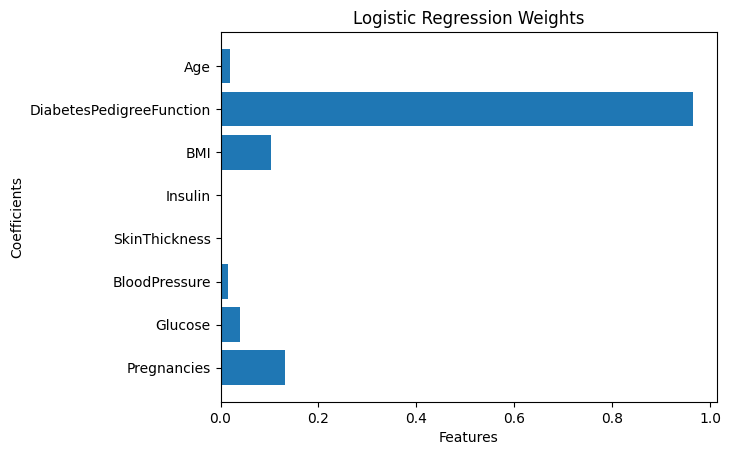

In [21]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Παρατηρούμε ότι τα 3 χαρακτηριστικά που επηρεάζουν περισσότερο το αποτέλεσμα του μοντέλου μας είναι τα εξής, κατά σειρά:
1. DiabetesPedigreeFucntion
2. Pregnancies
3. BMI

## ΜΕΡΟΣ 2

### ΕΡΩΤΗΜΑ 1

In [22]:
# inputs_df2 = diabetes.drop(columns=['Glucose','Outcome'])
inputs_df2 = diabetes[['Pregnancies','BloodPressure','BMI','Age']]
target_df2 = diabetes['Glucose']

x2 = inputs_df2.to_numpy()
y2 = target_df2.to_numpy()

x2.shape, y2.shape

((768, 4), (768,))

In [23]:
seed=0
test_size=0.30

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=test_size, random_state=seed)

### ΕΡΩΤΗΜΑ 2

In [24]:
linearmodel = LinearRegression()

In [25]:
linearmodel.fit(x2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Η πιο κατάλληλη μέθοδος για την μέτρηση της ακρίβειας του μοντέλου, στη συγκεκριμένη περίπτωση, είναι η Mean Absolute Error (MAE) επειδή τα δεδομένα μας δεν είναι όμοια κατανεμημένα οπότε οποιοδήποτε λάθος προκύψει λόγο κάποιου outlier δεν θα παίξει τόσο μεγάλο ρόλο στον υπολογισμό του λάθους με την Mean Absolute Error (MAE) συνάρτηση. Αντιθέτως, με την Mean Squared Error (MSE) συνάρτηση τα λάθη τέτοιου είδους αυξάνουν απότομα το σφάλμα του μοντέλου μας.

In [26]:
y2_pred = linearmodel.predict(x2_test)

mae = mean_absolute_error(y2_test, y2_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 23.599990462075155


### ΕΡΩΤΗΜΑ 3

In [27]:
lasso_maes = []
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
for alpha in alphas:
    lassomodel = Lasso(max_iter=1000, alpha=alpha)
    lassomodel.fit(x2_train, y2_train)

    ylas_pred = lassomodel.predict(x2_test)
    las_mae = mean_absolute_error(y2_test, y2_pred)
    lasso_maes.append(round(las_mae, 5))

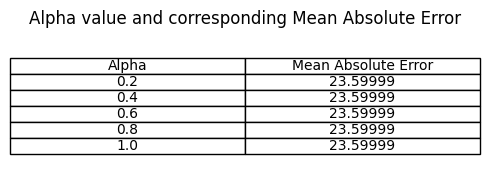

In [28]:
figure,axis = plt.subplots(figsize=(5,2))

alpha_maes = list(zip(alphas, lasso_maes))
axis.table(cellText=alpha_maes, colLabels=['Alpha', 'Mean Absolute Error'], loc='center', cellLoc='center')
axis.axis('off')

plt.title('Alpha value and corresponding Mean Absolute Error')
plt.tight_layout()
plt.show()

### ΕΡΩΤΗΜΑ 4

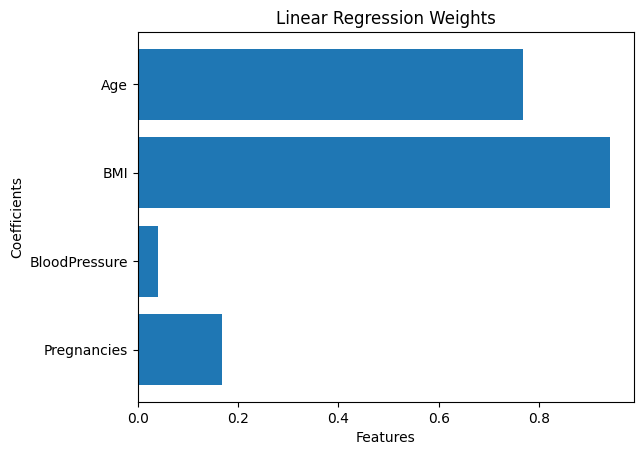

In [29]:
coefficients = linearmodel.coef_
importance_weights2 = np.abs(coefficients)

plt.barh(inputs_df2.columns, importance_weights2)
plt.title('Linear Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Παρατηρούμε ότι το χαρακτηριστικό με τη μικρότερη επιρροή στο μοντέλο μας είναι η αρτηριακή πίεση(*BloodPressure*), οπότε την αφαιρούμε.

In [30]:
x3 = inputs_df2.drop(columns=['BloodPressure']).to_numpy()
y3 = target_df2.to_numpy() # Den xreiazetai apla to xanadimiourgw gia na einai oles oi metavlites `3`. Mporousa na xrisimopoiisw kai tin metavliti `y2`

x3.shape

(768, 3)

In [31]:
seed=0
test_size=0.30

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=test_size, random_state=seed)

In [32]:
linearmodel2 = LinearRegression()

In [33]:
linearmodel2.fit(x3_train, y3_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y3_pred = linearmodel2.predict(x3_test)

mae2 = mean_absolute_error(y3_test, y3_pred)
print(f'Mean Absolute Error: {mae2}')

Mean Absolute Error: 23.615563643141343
